In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('IRIS.csv')
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
raw_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
raw_data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# One hot encode the species column
one_hot = pd.get_dummies(raw_data['species'])
df = raw_data.drop('species' ,axis = 1)
df = df.join(one_hot)

In [6]:
df.cov()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length,0.685694,-0.039268,1.273682,0.516904,-0.280984,0.031096,0.249888
sepal_width,-0.039268,0.188004,-0.321713,-0.117981,0.122148,-0.095302,-0.026846
petal_length,1.273682,-0.321713,3.113179,1.296387,-0.770022,0.168233,0.601790
petal_width,0.516904,-0.117981,1.296387,0.582414,-0.320358,0.042729,0.277629
Iris-setosa,-0.280984,0.122148,-0.770022,-0.320358,0.223714,-0.111857,-0.111857
Iris-versicolor,0.031096,-0.095302,0.168233,0.042729,-0.111857,0.223714,-0.111857
Iris-virginica,0.249888,-0.026846,0.601790,0.277629,-0.111857,-0.111857,0.223714


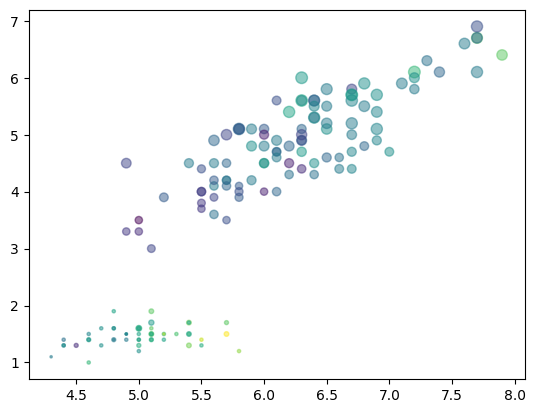

In [7]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# normalized dataframe
ndf = df.copy()
df.petal_width / df.petal_width.max()

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(ndf.sepal_length, ndf.petal_length, s=(ndf.petal_width / ndf.petal_width.max())*70, c=ndf.sepal_width / ndf.sepal_width.max(), alpha=0.5)
plt.show()

In [8]:
print(df.columns)
print(df.columns[:4])
print(df.columns[-3:])

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [9]:
color_map = {'Iris-setosa':(255,0,0), 'Iris-versicolor':(0,255,0), 'Iris-virginica':(0,0,255)}
colors = raw_data['species'].map(color_map)
colors

0      (255, 0, 0)
1      (255, 0, 0)
2      (255, 0, 0)
3      (255, 0, 0)
4      (255, 0, 0)
          ...     
145    (0, 0, 255)
146    (0, 0, 255)
147    (0, 0, 255)
148    (0, 0, 255)
149    (0, 0, 255)
Name: species, Length: 150, dtype: object

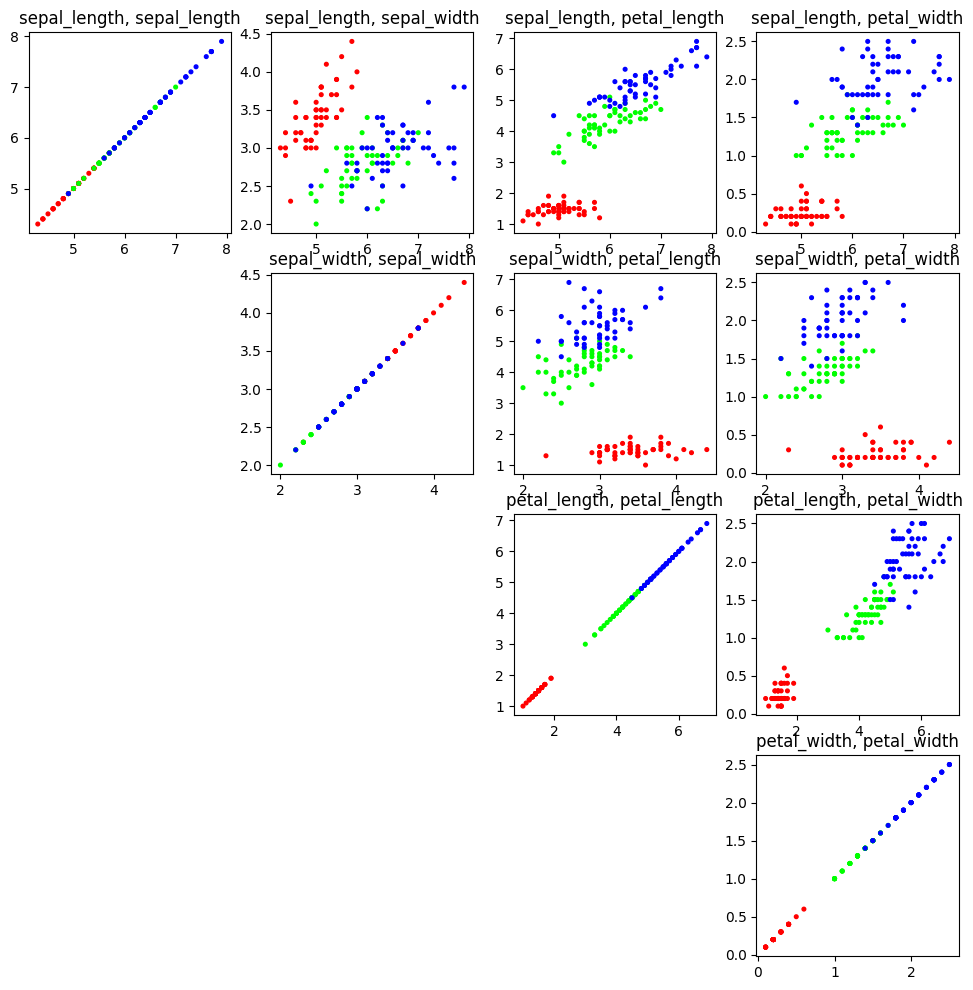

In [10]:
# I'm thinking I could make a voting algorithm where for each of these figure combinations I find the line that best divides the data 
# and each combination votes with a vote value scaled to its confidence

data_cols = df.columns[:4]
species_cols = df.columns[-3:]
color_map = {'Iris-setosa':(1,0,0), 'Iris-versicolor':(0,1,0), 'Iris-virginica':(0,0,1)}
colors = raw_data['species'].map(color_map)

plt.figure(figsize=(12, 12))

for col_1 in range(len(data_cols)):
    for col_2 in range(col_1, len(data_cols)):
        plt.subplot(4,4, (col_1 * 4) + col_2 + 1)
        plt.scatter(df[data_cols[col_1]], df[data_cols[col_2]], s=7, c=colors)
        plt.title(f'{data_cols[col_1]}, {data_cols[col_2]}')

In [11]:
from bestLineFinder import get_best_lines
best_lines = get_best_lines(df[data_cols[0]], df[data_cols[1]], raw_data['species'], species_cols)
print(best_lines)

{'Iris-setosa': Line(slope=1.1515151515151516, intercept=-2.951515151515152, direction=True, score=1.0), 'Iris-versicolor': Line(slope=0.2807017543859649, intercept=1.5508771929824563, direction=False, score=0.5054736842105264), 'Iris-virginica': Line(slope=2.5333333333333328, intercept=-11.77333333333333, direction=False, score=0.5984415584415584)}


In [12]:
points = {}
x_min = df[data_cols[0]].min()
x_max = df[data_cols[0]].max()
y_min = df[data_cols[1]].min()
y_max = df[data_cols[1]].max()

for c in best_lines.keys():
    
    p_left = (x_min, (best_lines[c].slope * x_min) + best_lines[c].intercept)
    p_right = (x_max, (best_lines[c].slope * x_max) + best_lines[c].intercept)
    p_top = ((y_max - best_lines[c].intercept) / best_lines[c].slope , y_max)
    p_bottom = ((y_min - best_lines[c].intercept) / best_lines[c].slope , y_min)
    
    p_list = set([p_left, p_right, p_top, p_bottom])
    
    res = []
    for p in p_list:
        if x_min <= p[0] and p[0] <= x_max:
            if y_min <= p[1] and p[1] <= y_max:
                res.append(p)

    points[c] = res
    
points

{'Iris-setosa': [(4.3, 2.0), (6.38421052631579, 4.4)],
 'Iris-versicolor': [(4.3, 2.7578947368421054), (7.9, 3.768421052631579)],
 'Iris-virginica': [(6.3842105263157904, 4.4), (5.436842105263158, 2.0)]}

In [13]:
print([x_min, x_max, y_min, y_max])

[4.3, 7.9, 2.0, 4.4]


Text(0.5, 1.0, 'sepal_length, sepal_width')

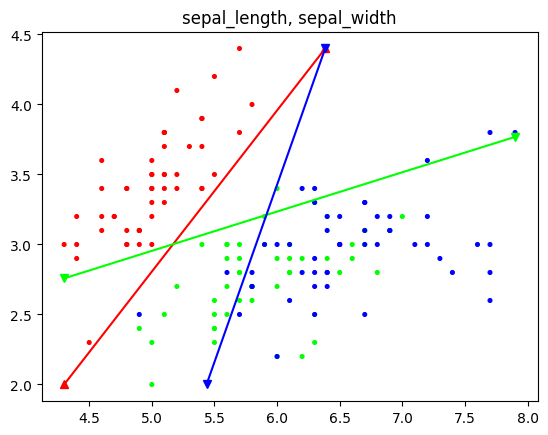

In [14]:
plt.scatter(df[data_cols[0]], df[data_cols[1]], s=7, c=colors)

for c in best_lines.keys():
    plt.plot([points[c][0][0], points[c][1][0]], [points[c][0][1], points[c][1][1]], c=color_map[c], marker= '^' if best_lines[c].direction else 'v')
plt.title(f'{data_cols[0]}, {data_cols[1]}')

In [15]:
from ColPairThresholdClassifier import ColPairThresholdClassifier as CPTC

In [16]:
df.columns
print(df.columns.drop('sepal_length'))
print(df.columns)

Index(['sepal_width', 'petal_length', 'petal_width', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='object')


In [17]:
cptc = CPTC()
cptc.plot_data(df, raw_data)
cptc.load_data(raw_data, target='species', timer=True)

No model Error
Line fitting took 7.452255487442017 seconds for column pair sepal_length, sepal_length
Line fitting took 7.9292755126953125 seconds for column pair sepal_length, sepal_width
Line fitting took 7.377162456512451 seconds for column pair sepal_length, petal_length
Line fitting took 7.360662460327148 seconds for column pair sepal_length, petal_width
Line fitting took 6.896586179733276 seconds for column pair sepal_width, sepal_width
Line fitting took 7.3169636726379395 seconds for column pair sepal_width, petal_length
Line fitting took 7.414595127105713 seconds for column pair sepal_width, petal_width
Line fitting took 6.822062253952026 seconds for column pair petal_length, petal_length
Line fitting took 7.031241416931152 seconds for column pair petal_length, petal_width
Line fitting took 7.450011730194092 seconds for column pair petal_width, petal_width
Model loaded


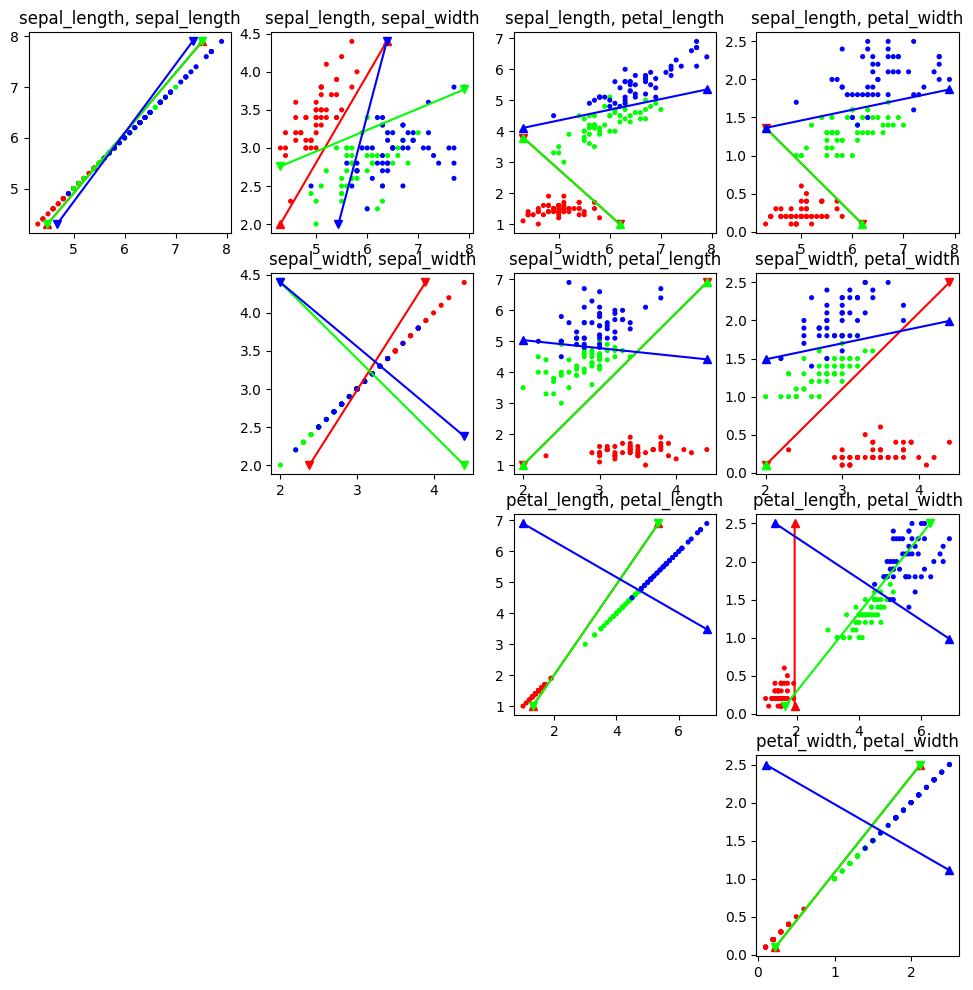

In [18]:
cptc.plot_data(df, raw_data)

In [19]:
cptc.test(df[data_cols])

Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
I

In [20]:
df.assign(Prediction=lambda df: (cptc.predict_on_row(df)))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
above

In [ ]:
df2 = df.copy()

In [ ]:
df2.assign(test=lambda df2: df.sepal_length * df.sepal_width)